# Storm Damage Detection
### *This Python notebook will showcase our **deliverable product** and its **abilities** from start to finish.*   

Goal: Identify the following types of buildings

|               | Undamaged            | Damaged              |
|---------------|----------------------|----------------------|
| **Residential**   | Undamaged Residential| Damaged Residential  |
| **Commercial**    | Undamaged Commercial | Damaged Commercial   |

and vehicles from satellite imagery

$\space$


#### We developed two models for detecting the buildings: **Mutli-class** and **Hierarchical** Detection Models
#### But first, lets detect vehicles

### 1. Vehicle Detection Model:

In [92]:
from ultralytics import YOLO
from PIL import Image
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Initialize the model with the custom weights
weights_path = "/content/drive/MyDrive/EYProject/CIS4496_Deliverable/code/deliverable/model_results/transportation/detect_transportation_objects.pt"
model = YOLO(weights_path)

# Set the directory containing the images
image_dir = "/content/drive/MyDrive/EYProject/CIS4496_Deliverable/given/Submission data"

# Process the images
for image_name in os.listdir(image_dir):
    if image_name.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
        # Construct the full image path
        image_path = os.path.join(image_dir, image_name)

        # Load the image
        image = Image.open(image_path)

        # Convert the image to RGB if it's not already
        if image.mode != 'RGB':
            image = image.convert('RGB')

        # Predict using the model with specified thresholds for confidence and IOU
        results = model.predict([image_path], save=False, conf=0.01, iou=0.4, agnostic_nms=True)

        # Prepare to draw on the image using matplotlib
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.imshow(image)
        ax.axis('off')  # Hide axes

        # Access the boxes and draw them with transparency
        if results:
            result = results[0]  # Assuming there's only one result since we are processing one image at a time
            for box in result.boxes:
                x1, y1, x2, y2 = box.xyxy[0].tolist()  # Extract coordinates
                rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='orange', facecolor='orange', alpha=0.5)
                ax.add_patch(rect)

        # Display the image
        plt.show()


Output hidden; open in https://colab.research.google.com to view.

Now that we have completed the model for vehicles, we can map the buildings and their classes:
### 2. Multi-class Detection Model:
#### Training Results:  

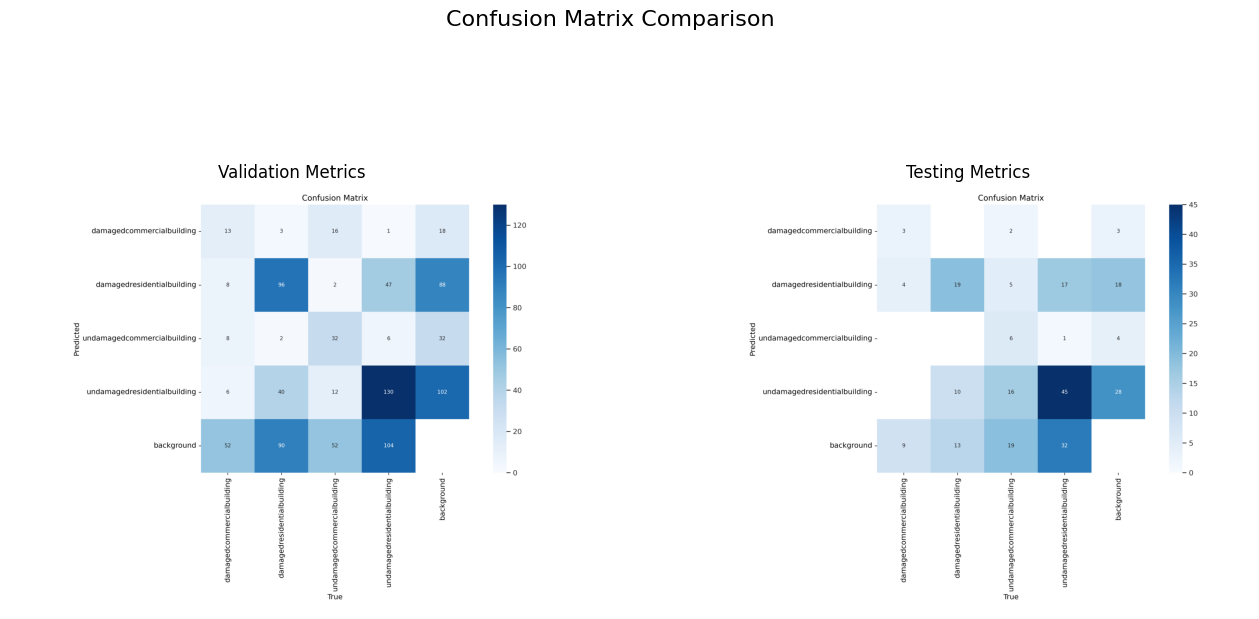

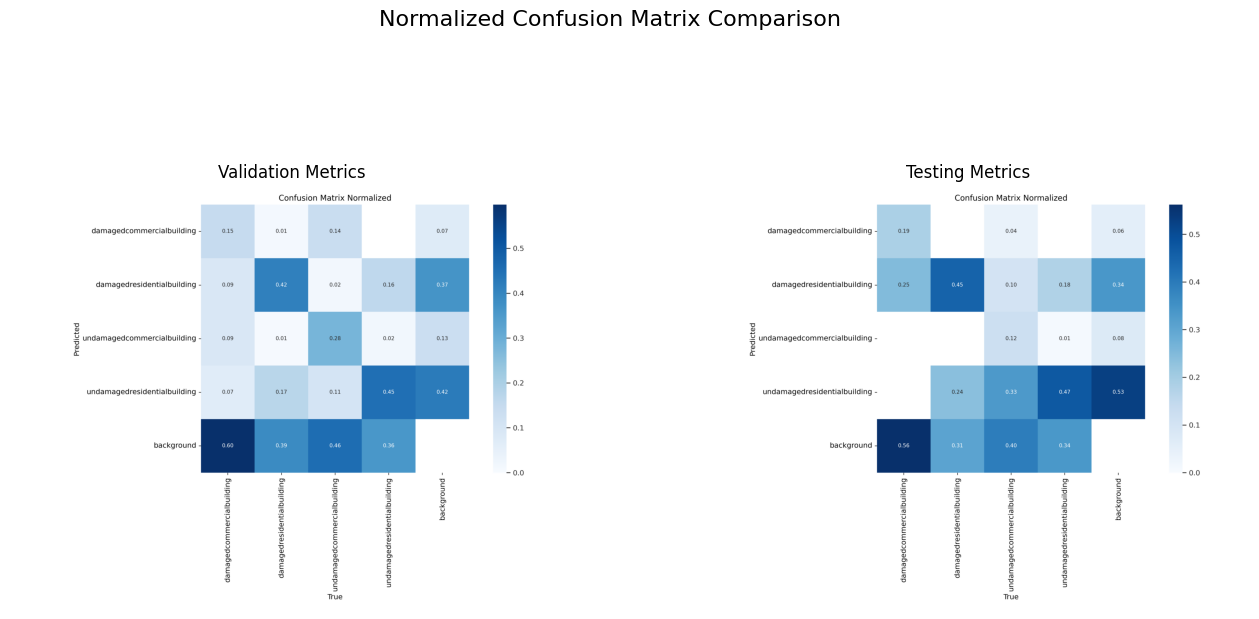

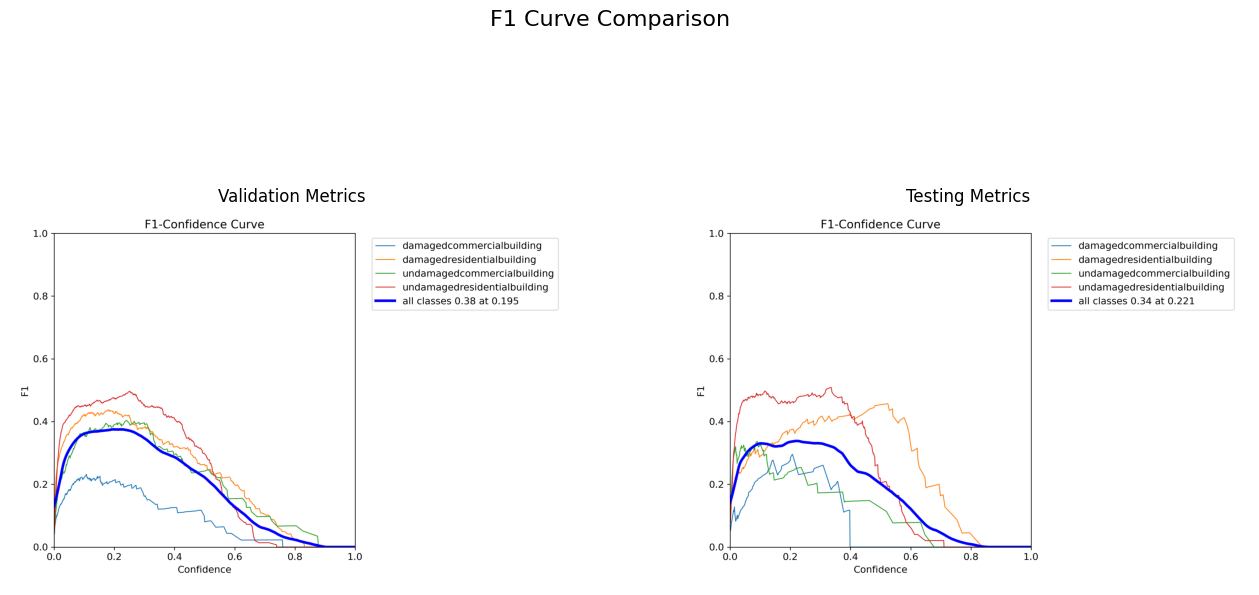

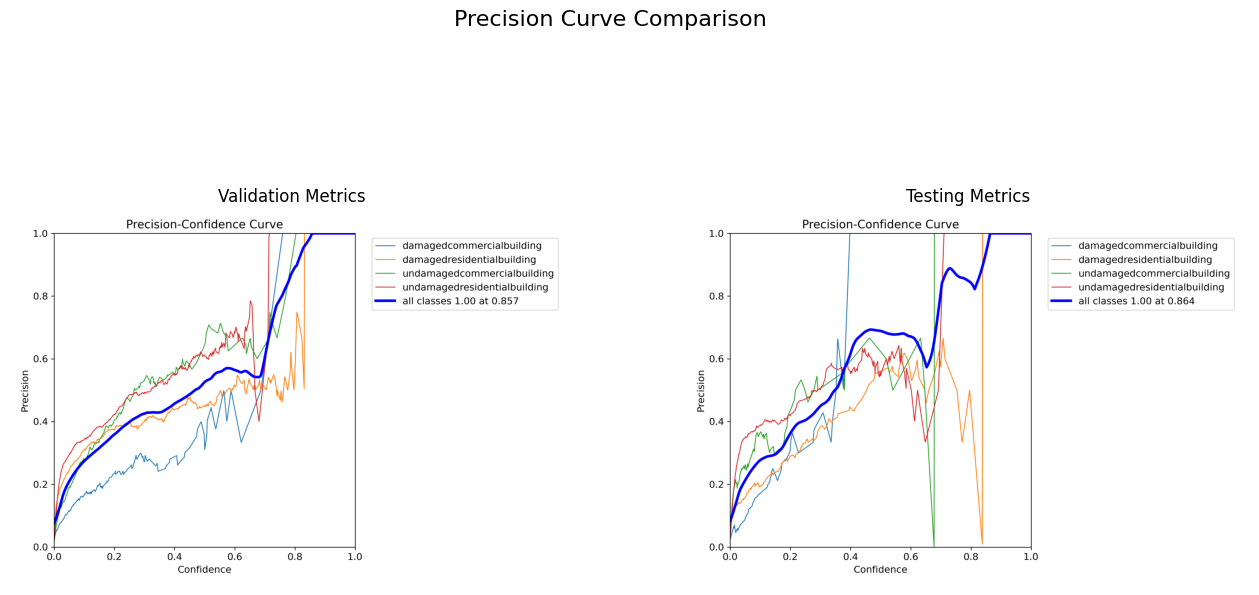

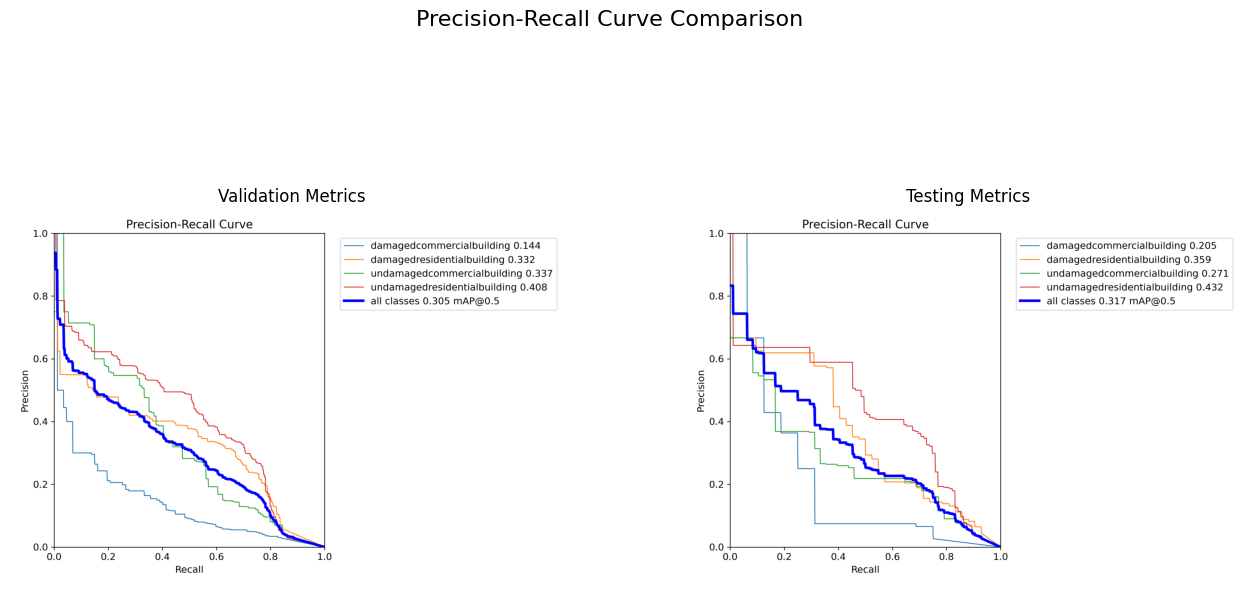

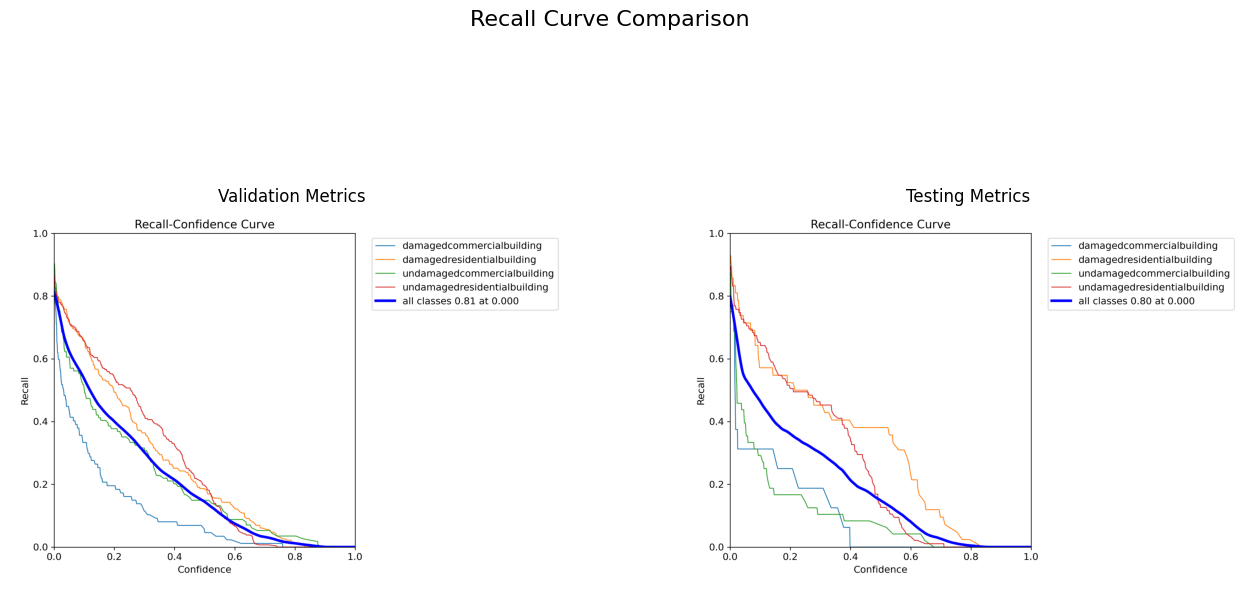

In [95]:
from PIL import Image
import matplotlib.pyplot as plt

# Define paths and descriptions for validation and testing images
validation_paths = {
    "Confusion Matrix": "/content/drive/MyDrive/EYProject/CIS4496_Deliverable/code/deliverable/model_results/MultiClassModelLongerTraining_results/results_validation/confusion_matrix.png",
    "Normalized Confusion Matrix": "/content/drive/MyDrive/EYProject/CIS4496_Deliverable/code/deliverable/model_results/MultiClassModelLongerTraining_results/results_validation/confusion_matrix_normalized.png",
    "F1 Curve": "/content/drive/MyDrive/EYProject/CIS4496_Deliverable/code/deliverable/model_results/MultiClassModelLongerTraining_results/results_validation/F1_curve.png",
    "Precision Curve": "/content/drive/MyDrive/EYProject/CIS4496_Deliverable/code/deliverable/model_results/MultiClassModelLongerTraining_results/results_validation/P_curve.png",
    "Precision-Recall Curve": "/content/drive/MyDrive/EYProject/CIS4496_Deliverable/code/deliverable/model_results/MultiClassModelLongerTraining_results/results_validation/PR_curve.png",
    "Recall Curve": "/content/drive/MyDrive/EYProject/CIS4496_Deliverable/code/deliverable/model_results/MultiClassModelLongerTraining_results/results_validation/R_curve.png"
}

testing_paths = {
    "Confusion Matrix": "/content/drive/MyDrive/EYProject/CIS4496_Deliverable/code/deliverable/model_results/MultiClassModelLongerTraining_results/results_testing/confusion_matrix.png",
    "Normalized Confusion Matrix": "/content/drive/MyDrive/EYProject/CIS4496_Deliverable/code/deliverable/model_results/MultiClassModelLongerTraining_results/results_testing/confusion_matrix_normalized.png",
    "F1 Curve": "/content/drive/MyDrive/EYProject/CIS4496_Deliverable/code/deliverable/model_results/MultiClassModelLongerTraining_results/results_testing/F1_curve.png",
    "Precision Curve": "/content/drive/MyDrive/EYProject/CIS4496_Deliverable/code/deliverable/model_results/MultiClassModelLongerTraining_results/results_testing/P_curve.png",
    "Precision-Recall Curve": "/content/drive/MyDrive/EYProject/CIS4496_Deliverable/code/deliverable/model_results/MultiClassModelLongerTraining_results/results_testing/PR_curve.png",
    "Recall Curve": "/content/drive/MyDrive/EYProject/CIS4496_Deliverable/code/deliverable/model_results/MultiClassModelLongerTraining_results/results_testing/R_curve.png"
}

# Titles for sections
validation_title = "Validation Metrics"
testing_title = "Testing Metrics"

# Plotting both validation and testing images side by side
for key in validation_paths:
    # Load validation and testing images
    img_val = Image.open(validation_paths[key])
    img_test = Image.open(testing_paths[key])

    # Create a subplot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

    # Set titles for the plots
    fig.suptitle(f"{key} Comparison", fontsize=16)
    ax1.set_title(validation_title)
    ax2.set_title(testing_title)

    # Show validation image
    ax1.imshow(img_val)
    ax1.axis('off')  # Hide axes for clean look

    # Show testing image
    ax2.imshow(img_test)
    ax2.axis('off')  # Hide axes for clean look

    # Show the figure with images
    plt.show()


#### Model predictions on unseen images:

In [93]:
from ultralytics import YOLO
from PIL import Image
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load both models with their custom weights
model_vehicle = YOLO("/content/drive/MyDrive/EYProject/CIS4496_Deliverable/code/deliverable/model_results/transportation/detect_transportation_objects.pt")
model_multi_class = YOLO("/content/drive/MyDrive/EYProject/CIS4496_Deliverable/code/deliverable/model_results/MultiClassModelLongerTraining_results/results_validation/weights/best.pt")

# Set the directory containing the images
image_dir = "/content/drive/MyDrive/EYProject/CIS4496_Deliverable/given/Submission data"

# Define colors for different classes of the multi-class model
class_colors = {
    "0": "green",
    "1": "lime",
    "2": "blue",
    "3": "aqua",
    "4": "orange"
}

# Process the images
for image_name in os.listdir(image_dir):
    if image_name.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
        image_path = os.path.join(image_dir, image_name)
        image = Image.open(image_path)
        image = image.convert('RGB')

        # Predict with both models
        results_vehicle = model_vehicle.predict([image_path], save=False, conf=0.01, iou=0.4, agnostic_nms=True)
        results_multi_class = model_multi_class.predict([image_path], save=False, conf=0.05, iou=0.3, agnostic_nms=True)

        # Setup matplotlib figure
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.imshow(image)
        ax.axis('off')

        # Vehicle Model Predictions
        if results_vehicle:
            result_vehicle = results_vehicle[0]
            for box in result_vehicle.boxes:
                x1, y1, x2, y2 = box.xyxy[0].tolist()
                rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='orange', facecolor='orange', alpha=0.5)
                ax.add_patch(rect)

        # Multi-Class Model Predictions
        added_labels = {}
        if results_multi_class:
            result_multi_class = results_multi_class[0]
            for box in result_multi_class.boxes:
                x1, y1, x2, y2 = [round(x, 2) for x in box.xyxy[0].tolist()]
                cls_id = int(box.cls[0].item())
                color = class_colors.get(str(cls_id), "white")
                rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor=color, facecolor='none')
                ax.add_patch(rect)
                added_labels[cls_id] = color

        # Create legend entries
        legend_handles = [patches.Patch(color=class_colors[key], label=model_multi_class.names[int(key)]) for key in class_colors if int(key) in added_labels]

        # Add the 'transportation' label to the legend with light orange color
        legend_handles.append(patches.Patch(color='orange', label = 'transportation'))

        # Display the legend with fixed order
        plt.legend(handles=legend_handles, loc='upper right', fontsize='small', title="Legend")
        plt.show()


Output hidden; open in https://colab.research.google.com to view.

## 3. Hierarchical Model

In [91]:
# Code for hierarchical model

##### Mount Google Drive and Download Needed Libraries (Will's Setup)
###### Add your own set-up code if needed

In [1]:
from google.colab import drive
import os
from pathlib import Path

def mount_google_drive():
    drive_mount_path = '/content/drive'
    try:
        if not os.path.ismount(drive_mount_path):
            drive.mount(drive_mount_path)
            print("Google Drive mounted successfully.")
        else:
            print("Google Drive is already mounted.")
    except Exception as e:
        print(f"Failed to mount Google Drive: {e}")

def setup_project():
    mount_google_drive()
    drive_root = Path('/content/drive/MyDrive')
    ey_project_path = drive_root / 'EYProject'

    # Ensure EYProject directory exists
    ey_project_path.mkdir(parents=True, exist_ok=True)
    print(f"Directory setup completed at {ey_project_path}")

    # Move to CIS4496_EY directory
    os.chdir(ey_project_path  / 'CIS4496_EY/DetectBuildings')
    print(f"Setup completed. Current directory: {os.getcwd()}")

    # Install libraries
    !pip install ultralytics
    !pip install yolov8

setup_project()

Mounted at /content/drive
Google Drive mounted successfully.
Directory setup completed at /content/drive/MyDrive/EYProject
Setup completed. Current directory: /content/drive/MyDrive/EYProject/CIS4496_EY/DetectBuildings
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.8/750.8 kB 3.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Usi